In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn import preprocessing
from sklearn import utils


In [2]:
# Load dataset (we're only using VALIDATION set as our data)
original_df = pd.read_parquet('dataset/316_v4_validation.parquet')

In [3]:
original_df.head(5)

,era,data_type,feature_honoured_observational_balaamite,feature_polaroid_vadose_quinze,feature_untidy_withdrawn_bargeman,feature_genuine_kyphotic_trehala,feature_unenthralled_sportful_schoolhouse,feature_divulsive_explanatory_ideologue,feature_ichthyotic_roofed_yeshiva,feature_waggly_outlandish_carbonisation,...,target_paul_v4_20,target_paul_v4_60,target_george_v4_20,target_george_v4_60,target_william_v4_20,target_william_v4_60,target_arthur_v4_20,target_arthur_v4_60,target_thomas_v4_20,target_thomas_v4_60
id,,,,,,,,,,,,,,,,,,,,,
n000101811a8a843,0575,validation,0.50,0.0,1.0,0.00,0.75,0.00,1.00,0.25,...,0.50,0.50,0.50,0.50,0.666667,0.500000,0.500000,0.500000,0.666667,0.500000
n001e1318d5072ac,0575,validation,0.25,1.0,0.5,0.50,0.25,0.75,0.75,0.00,...,0.00,0.25,0.00,0.50,0.166667,0.333333,0.333333,0.166667,0.166667,0.333333
n002a9c5ab785cbb,0575,validation,0.25,0.5,0.5,0.75,0.25,0.25,0.75,0.00,...,0.50,0.75,0.50,0.75,0.500000,0.666667,0.500000,0.666667,0.500000,0.666667
n002ccf6d0e8c5ad,0575,validation,0.50,1.0,0.5,1.00,0.50,1.00,0.75,0.50,...,0.25,0.00,0.25,0.00,0.166667,0.166667,0.333333,0.500000,0.333333,0.166667
n0051ab821295c29,0575,validation,0.50,0.0,0.0,0.25,0.00,1.00,0.50,0.25,...,0.50,0.50,0.50,0.50,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


In [4]:
era_0575_df = original_df.loc[original_df['era'] == '0575']    # Looking at this era
features = [f for f in list(original_df) if 'feature' in f]    # Getting feature columns
targets = [t for t in list(original_df) if 'target' in t]      # Getting target columns

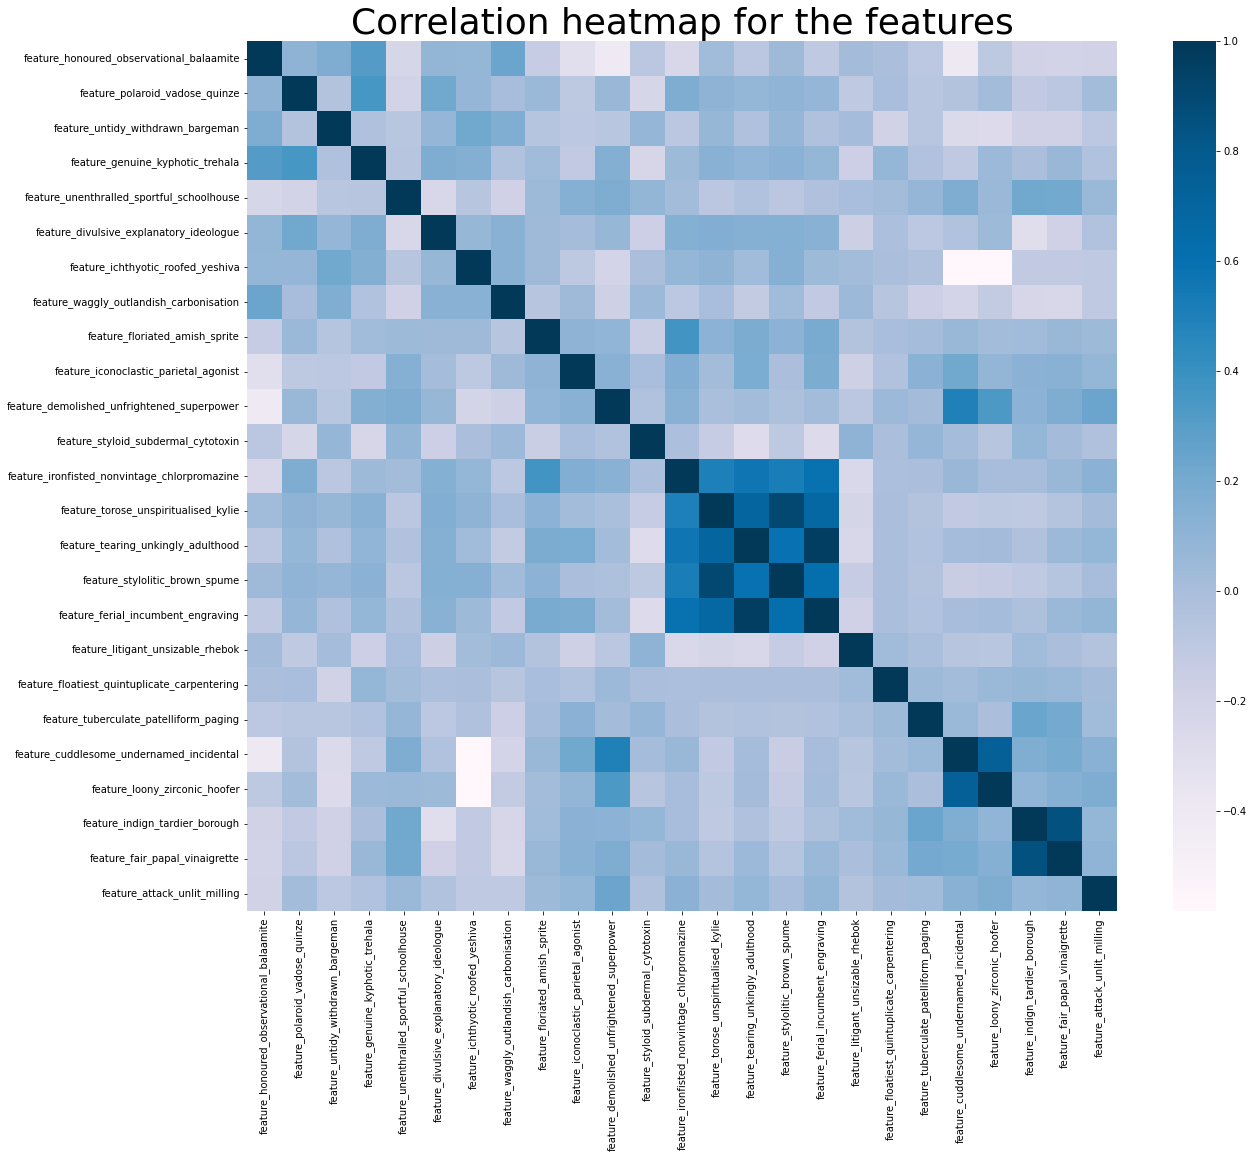

In [5]:
# Heatmap Feature Correlation (only looking at the first 25 features)
def heat_mat(df, features):
    corrmat = df[features[:25]].corr()

    f, ax = plt.subplots(figsize=(20, 16))

    sns.heatmap(corrmat, square = True, cmap = 'PuBu')
    plt.title('Correlation heatmap for the features', fontsize=36)

heat_mat(original_df, features)

/var/folders/_0/541h7pgs06l9wr3xp3jssnsc0000gn/T/ipykernel_12815/3798782086.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


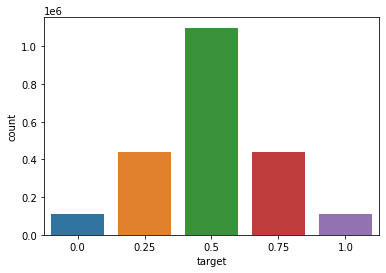

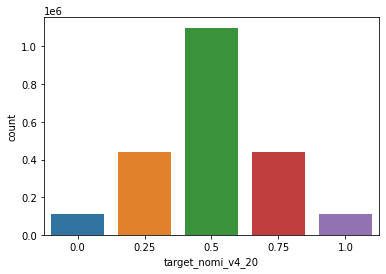

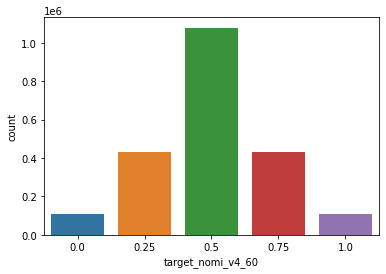

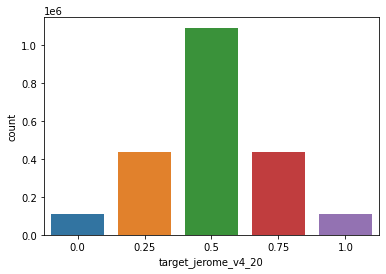

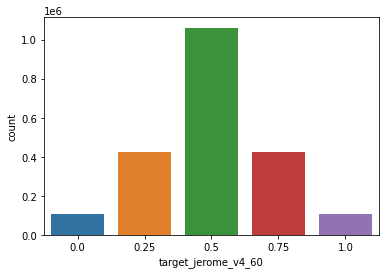

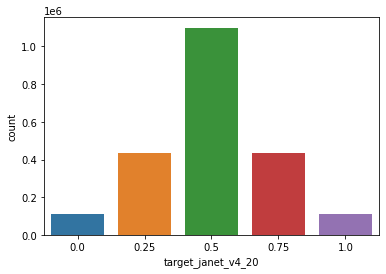

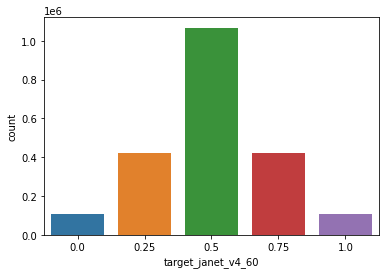

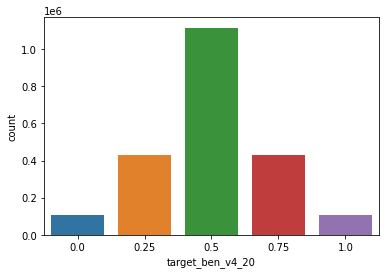

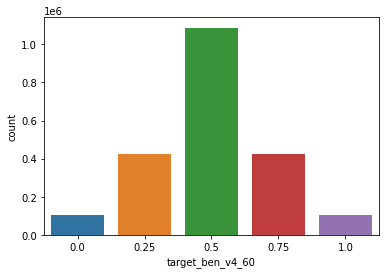

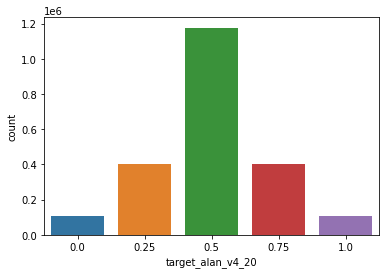

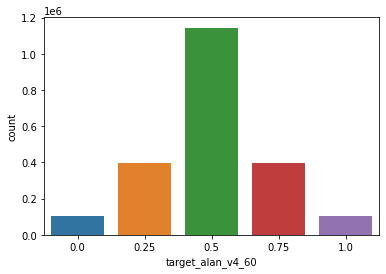

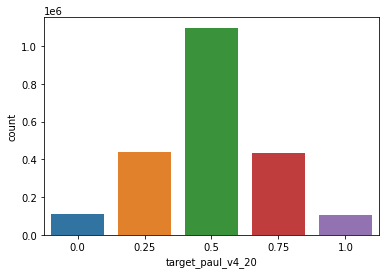

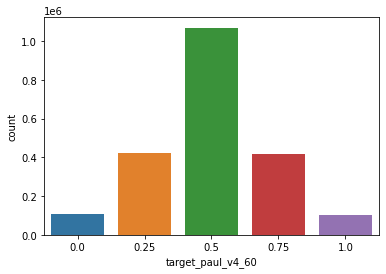

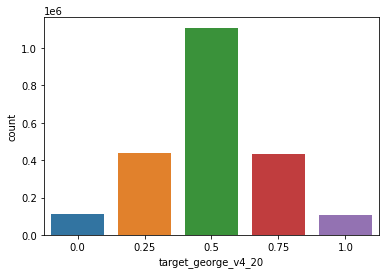

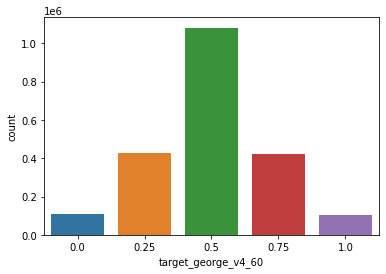

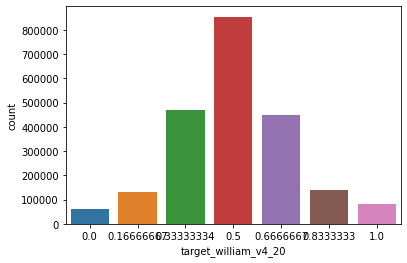

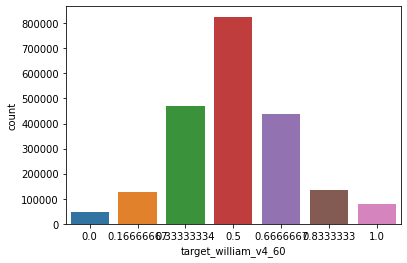

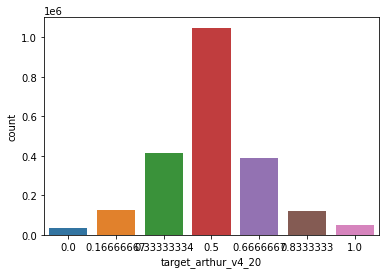

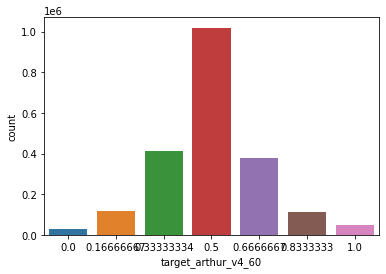

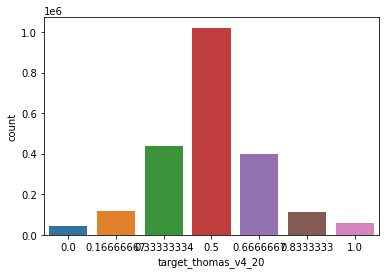

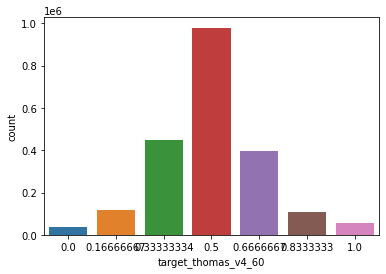

In [6]:
# Countplot Targets
def plot_target_correlation(df, targets):
    for i, col in enumerate(targets):
        plt.figure(i)
        sns.countplot(x=col, data=df)

plot_target_correlation(original_df, targets)

In [7]:
def linear_reg(X_train, y_train, X_test, y_test):

    model = LinearRegression()

    clf = model.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    linear_reg_score = clf.score(X_test, y_test)

    return prediction, linear_reg_score

In [8]:
def pipeline_model(X_train, y_train, X_test, y_test):

    lab_enc = preprocessing.LabelEncoder()
    y_train_encoded = lab_enc.fit_transform(y_train)
    y_test_encoded = lab_enc.fit_transform(y_test)

    # Create pipele
    pipeLine = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
    pipeLine.fit(X_train, y_train_encoded)
    score = pipeLine.score(X_test, y_test_encoded)

    return score

In [9]:
def logis_reg_model(X_train, y_train, X_test, y_test):

    lab_enc = preprocessing.LabelEncoder()
    y_train_encoded = lab_enc.fit_transform(y_train)
    y_test_encoded = lab_enc.fit_transform(y_test)

    # Define model
    model = LogisticRegression(penalty='l2', C=1, random_state=0)
    # Fit model
    clf = model.fit(X_train, y_train_encoded)
    # Calculate accuracy score
    score = clf.score(X_test, y_test_encoded)
    return score

In [11]:
X = era_0575_df[features]
linreg_score_list = [] 
pipeline_score_list = []
logisReg_score_list = []

for i in range(len(targets)):
  print(targets[i])
  
  y = era_0575_df[targets[i]]  # Loop through all targets

  y = y.replace(np.nan, 0)

  df_to_visualize = pd.concat([X, y], axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  prediction, score = linear_reg(X_train, y_train, X_test, y_test)
  # pipeline_score = pipeline_model(X_train, y_train, X_test, y_test)

  print(prediction)

  linreg_score_list.append(score)
  # pipeline_score_list.append(pipeline_score)

target_score = list(zip(targets, linreg_score_list))
score_df = pd.DataFrame(target_score, columns=['Targets', 'Linear_Reg_Score'])


target
[0.6467295  0.52007145 0.44603938 ... 0.5998289  0.5286739  0.32228997]
target_nomi_v4_20
[0.6467295  0.52007145 0.44603938 ... 0.5998289  0.5286739  0.32228997]
target_nomi_v4_60
[0.7930965  0.408699   0.36602244 ... 0.6875956  0.4337612  0.08284545]
target_jerome_v4_20
[0.77363914 0.50411624 0.35528943 ... 0.61892295 0.5460369  0.25025257]
target_jerome_v4_60
[0.65670264 0.34111333 0.32856905 ... 0.7591103  0.5263504  0.05040133]
target_janet_v4_20
[0.2955178  0.47237027 0.5564012  ... 0.59404254 0.49659342 0.4201179 ]
target_janet_v4_60
[0.24248177 0.4948117  0.38866    ... 0.63989276 0.53660977 0.25883698]
target_ben_v4_20
[0.5154638  0.39166567 0.46202952 ... 0.5510123  0.53056353 0.26287216]
target_ben_v4_60
[0.5274536  0.41444942 0.38135803 ... 0.75970066 0.4985363  0.01170343]
target_alan_v4_20
[0.00209743 0.5416925  0.5806022  ... 0.6410918  0.3874348  0.55667883]
target_alan_v4_60
[0.41392428 0.38023084 0.3575539  ... 0.6346259  0.5512655  0.2518278 ]
target_paul_v4_20

In [12]:
score_df

,Targets,Linear_Reg_Score
0,target,-0.446976
1,target_nomi_v4_20,-0.446976
2,target_nomi_v4_60,-0.518924
3,target_jerome_v4_20,-0.454080
4,target_jerome_v4_60,-0.485985
5,target_janet_v4_20,-0.824759
6,target_janet_v4_60,-0.863093
7,target_ben_v4_20,-0.499544
8,target_ben_v4_60,-0.532771
9,target_alan_v4_20,-0.927516


In [13]:
y = era_0575_df[targets[0]]  # Loop through all targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_test.shape)

# Prediction == ndarray
prediction, score = linear_reg(X_train, y_train, X_test, y_test)

(1585, 1191)


In [ ]:
prediction_arr = np.empty([len(X_test),])

In [14]:
testing_arr = np.stack((prediction_arr, prediction), axis=1)
print(testing_arr)
print(testing_arr.shape)

NameError: name 'prediction_arr' is not defined

In [ ]:
test_arr = np.concatenate((prediction_arr, prediction), axis=1)
print(test_arr)
print(test_arr.shape)

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
def OLS(X, y):
    pseudo_inv = np.linalg.inv(np.matmul(np.transpose(X), X))
    w = np.matmul(pseudo_inv, np.transpose(X))
    w = np.matmul(w, y)
    return w

ols_result = OLS(X_train, y_train)   # w for each id in 
ols_result = pd.DataFrame(ols_result, columns=['OLS_Result'])
ols_result

/var/folders/_0/541h7pgs06l9wr3xp3jssnsc0000gn/T/ipykernel_10946/2230930810.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  pseudo_inv = np.linalg.inv(np.matmul(np.transpose(X), X))


,OLS_Result
0,0.006965
1,-0.051838
2,-0.004083
3,0.020582
4,-0.045591
...,...
1186,-0.046140
1187,-0.006052
1188,0.031541
1189,0.047811
